# In this section, test the interaction effects between Drug and Task Type. To answer the question, "is the TaskType affecting the Drug effects?" Conclusion: the interaction between Drug and TaskType is not significant.

In [1]:
import pandas as pd
import numpy as np

# Create the dataset with updated dynamic feature names
data = pd.DataFrame({
    'Subject': np.arange(1, 30),
    
    
    'FractionalOccupancyFPN_plus_MP':[0.091439689,0.15324165,0.229249012,0.128968254,0.161100196,0.143141153,0.180769231,0.154440154,0.148076923,0.106471816,0.162280702,0.218568665,0.256410256,0.168627451,0.139442231,0.142284569,0.23699422,0.109126984,0.127413127,0.184615385,0.157258065,0.171717172,0.165384615,0.188824663,0.144230769,0.113461538,0.149606299,0.218181818,0.209255533],
    'FractionalOccupancyFPN_plus_PL':[0.060784314,0.149068323,0.187984496,0.171907757,0.123173278,0.161538462,0.143968872,0.099787686,0.10982659,0.150313152,0.12195122,0.237451737,0.250980392,0.208494208,0.169291339,0.12815534,0.163776493,0.107296137,0.122580645,0.154004107,0.172619048,0.210629921,0.182879377,0.140384615,0.046421663,0.096711799,0.112,0.146067416,0.181015453],
    
    'DwellTimeFPN_plus_MP':[0.227626459,0.194499018,0.171936759,0.176587302,0.172888016,0.186878728,0.221153846,0.185328185,0.175,0.167014614,0.175438596,0.112185687,0.143984221,0.203921569,0.252988048,0.128256513,0.082851638,0.291666667,0.164092664,0.251923077,0.155241935,0.123232323,0.184615385,0.198458574,0.105769231,0.175,0.125984252,0.151515152,0.209255533],
    'DwellTimeFPN_plus_PL':[0.262745098,0.271221532,0.228682171,0.188679245,0.200417537,0.194230769,0.233463035,0.101910828,0.263969171,0.198329854,0.201219512,0.154440154,0.215686275,0.206563707,0.216535433,0.240776699,0.146435453,0.300429185,0.225806452,0.310061602,0.23015873,0.190944882,0.190661479,0.2,0.30754352,0.292069632,0.228,0.164044944,0.022075055],
    
    
    'RT_2ball_MP':[1.22,0.940143,1.432714,1.154833,0.945667,0.994714,0.6265,0.411167,0.575333,1.050167,0.307714,1.213286,1.333333,0.720833,1.0926,0.466429,0.888,1.4315,0.616667,0.851667,1.406571,1.267,0.6938,0.972167,0.369,0.556857,0.687286,0.574,0.8275],
    'RT_2ball_PL':[1.041143,0.583333,1.1298,0.989429,1.276,1.11,1.09025,1.403286,1.143143,1.339333,1.637,0.984833,1.0804,0.707,0.76,0.512,0.82875,1.161286,0.686667,1.174857,1.2235,1.118143,0.4565,1.322857,0.668571,0.559,0.793167,0.877714,1.271667],
    
    'RT_3ball_MP':[0.862833,1.158,1.051,1.159286,1.042167,0.794667,0.9075,1.019571,0.702,0.5162,0.498,1.1118,1.044,1.060667,0.788714,1.128333,1.203,1.187,1.341429,0.434143,0.641833,0.808143,1.21525,0.569167,0.652571,0.609333,1.2532,1.048714,1.203167],
    'RT_3ball_PL':[1.322167,0.916143,0.994333,0.702333,1.3534,1.430667,1.420833,1.337167,1.056167,0.54,0.68675,0.432167,1.162333,1.033429,0.7366,1.302571,1.388,0.528667,1.307667,0.831833,0.8145,1.2,0.576167,0.943167,0.943333,1.4586,1.4264,0.5408,1.033857],
    
        
    'HitRate_2ball_MP':[100,100,100,100,100,100,93.333333,100,93.333333,93.333333,100,100,100,93.333333,93.333333,100,100,100,100,100,86.666667,93.333333,80,100,93.333333,100,100,100,93.333333],
    'HitRate_2ball_PL':[93.333333,46.666667,93.333333,100,100,100,86.666667,100,100,73.333333,73.333333,100,73.333333,100,100,100,53.333333,93.333333,93.333333,100,80,100,80,100,100,86.666667,93.333333,100,100],
        
    'HitRate_3ball_MP':[86.666667,100,100,100,80,100,100,100,93.333333,93.333333,100,93.333333,100,100,100,100,100,73.333333,100,100,86.666667,100,53.333333,93.333333,100,100,93.333333,100,93.333333],
    'HitRate_3ball_PL':[86.666667,100,86.666667,100,93.333333,66.666667,93.333333,100,100,60,40,86.666667,100,100,93.333333,100,40,86.666667,100,100,80,100,93.333333,100,100,86.666667,86.666667,93.333333,100],
})


# Reshape the data to long format for response time
data_rt=pd.melt(data, id_vars=['Subject'],
                  value_vars=['RT_2ball_MP', 'RT_2ball_PL', 'RT_3ball_MP', 'RT_3ball_PL'],
                  var_name='Condition', value_name='TaskPerformance')

In [2]:
# Add columns for Drug and TaskType
data_rt['Drug'] = data_rt['Condition'].apply(lambda x: 'MP' if 'MP' in x else 'PL')
data_rt['TaskType'] = data_rt['Condition'].apply(lambda x: '2-ball' if '2ball' in x else '3-ball')

# Map the corresponding dynamic feature values
data_rt['FractionalOccupancyFPN_plus'] = data_rt.apply(lambda row: data.loc[row['Subject']-1, f'FractionalOccupancyFPN_plus_{row["Drug"]}'], axis=1)
data_rt['DwellTimeFPN_plus'] = data_rt.apply(lambda row: data.loc[row['Subject']-1, f'DwellTimeFPN_plus_{row["Drug"]}'], axis=1)

# Reshape the data to long format for hit rate
data_hit = pd.melt(data, id_vars=['Subject'],
                   value_vars=['HitRate_2ball_MP', 'HitRate_2ball_PL', 'HitRate_3ball_MP', 'HitRate_3ball_PL'],
                   var_name='Condition', value_name='TaskPerformance')

# Add columns for Drug and TaskType
data_hit['Drug'] = data_hit['Condition'].apply(lambda x: 'MP' if 'MP' in x else 'PL')
data_hit['TaskType'] = data_hit['Condition'].apply(lambda x: '2-ball' if '2ball' in x else '3-ball')

# Map the corresponding dynamic feature values
data_hit['FractionalOccupancyFPN_plus'] = data_hit.apply(lambda row: data.loc[row['Subject']-1, f'FractionalOccupancyFPN_plus_{row["Drug"]}'], axis=1)
data_hit['DwellTimeFPN_plus'] = data_hit.apply(lambda row: data.loc[row['Subject']-1, f'DwellTimeFPN_plus_{row["Drug"]}'], axis=1)



# Display the first few rows of the datasets
print(data_rt)
data_rt.to_csv('data_rt_new.csv', index=False)
#print(data_hit.head())

     Subject    Condition  TaskPerformance Drug TaskType  \
0          1  RT_2ball_MP         1.220000   MP   2-ball   
1          2  RT_2ball_MP         0.940143   MP   2-ball   
2          3  RT_2ball_MP         1.432714   MP   2-ball   
3          4  RT_2ball_MP         1.154833   MP   2-ball   
4          5  RT_2ball_MP         0.945667   MP   2-ball   
..       ...          ...              ...  ...      ...   
111       25  RT_3ball_PL         0.943333   PL   3-ball   
112       26  RT_3ball_PL         1.458600   PL   3-ball   
113       27  RT_3ball_PL         1.426400   PL   3-ball   
114       28  RT_3ball_PL         0.540800   PL   3-ball   
115       29  RT_3ball_PL         1.033857   PL   3-ball   

     FractionalOccupancyFPN_plus  DwellTimeFPN_plus  
0                       0.091440           0.227626  
1                       0.153242           0.194499  
2                       0.229249           0.171937  
3                       0.128968           0.176587  
4        

/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                               Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              TaskPerformance
No. Observations:              116                  Method:                          REML           
No. Groups:                    29                   Scale:                           0.0942         
Min. group size:               4                    Log-Likelihood:                  -26.5887       
Max. group size:               4                    Converged:                       Yes            
Mean group size:               4.0                                                                  
----------------------------------------------------------------------------------------------------
                                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------------
Intercept             

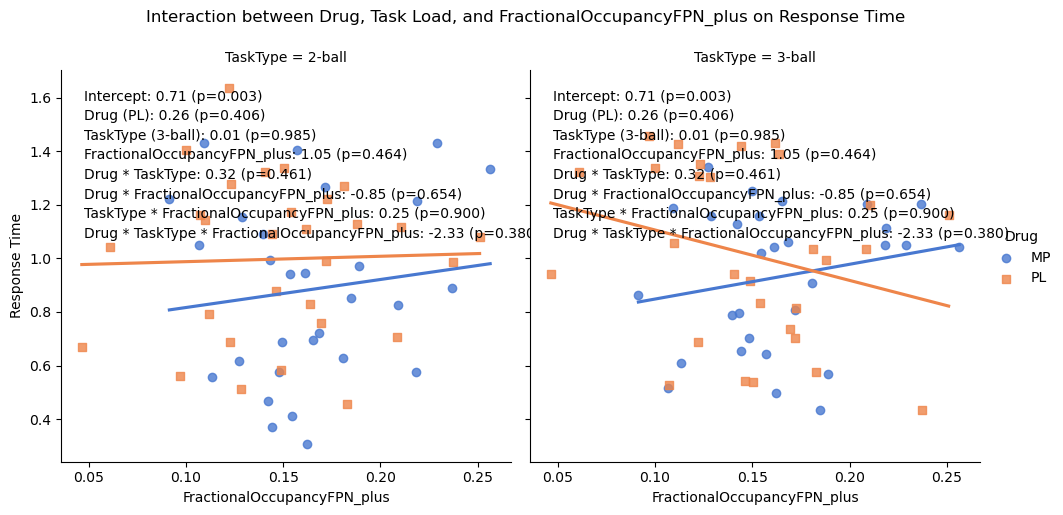

/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                          Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          TaskPerformance
No. Observations:            116              Method:                      REML           
No. Groups:                  29               Scale:                       0.0940         
Min. group size:             4                Log-Likelihood:              -27.2357       
Max. group size:             4                Converged:                   Yes            
Mean group size:             4.0                                                          
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                        0.645    0.228  2.837 0.005  0.200  1.091
Drug[T.PL]                

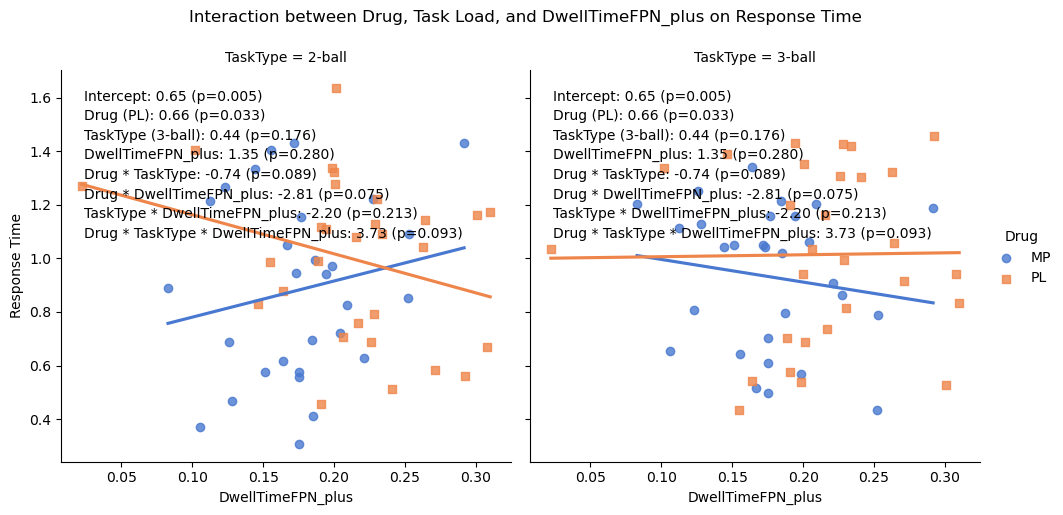

                                 Mixed Linear Model Regression Results
Model:                           MixedLM               Dependent Variable:               TaskPerformance
No. Observations:                116                   Method:                           REML           
No. Groups:                      29                    Scale:                            133.4009       
Min. group size:                 4                     Log-Likelihood:                   -426.2454      
Max. group size:                 4                     Converged:                        Yes            
Mean group size:                 4.0                                                                    
--------------------------------------------------------------------------------------------------------
                                                           Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
-----------------------------------------------------------------------------------------

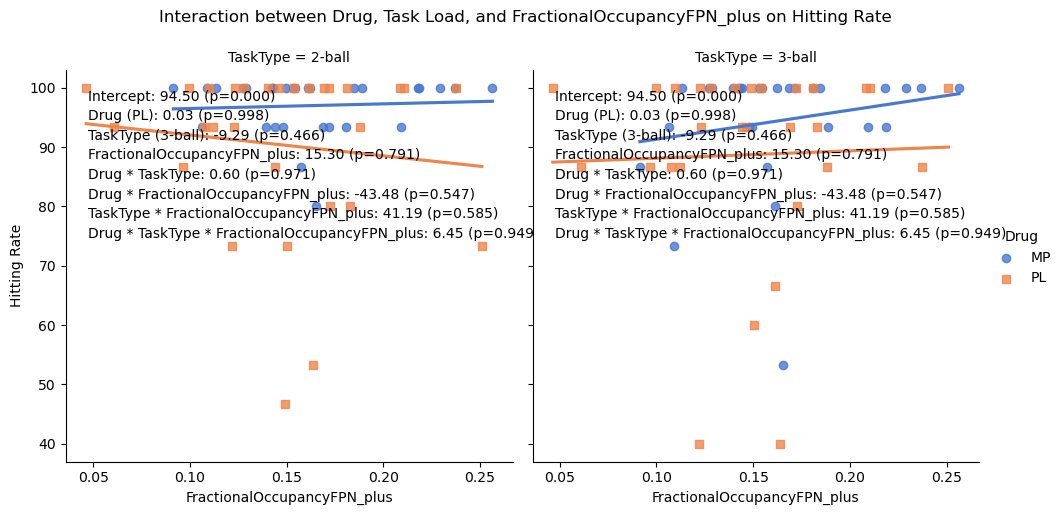

                            Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            TaskPerformance
No. Observations:            116                Method:                        REML           
No. Groups:                  29                 Scale:                         128.3946       
Min. group size:             4                  Log-Likelihood:                -426.1211      
Max. group size:             4                  Converged:                     Yes            
Mean group size:             4.0                                                              
----------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
----------------------------------------------------------------------------------------------
Intercept                                       101.425    9.251 10.964 0.000  

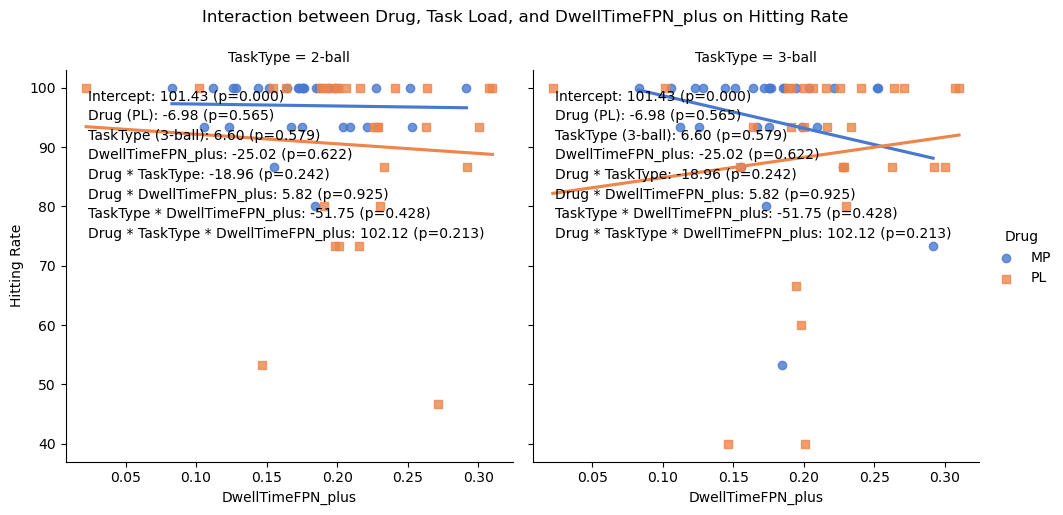

In [3]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to fit the mixed-effects model and plot the results
def fit_mixed_model_and_plot(data, dynamic_feature, performance_type):
    formula = f"TaskPerformance ~ Drug * TaskType * {dynamic_feature}"
    model = smf.mixedlm(formula, data, groups=data["Subject"])
    result = model.fit()
    
    # Extract the summary statistics
    coef = result.params
    pvalues = result.pvalues
    
    # Display the model summary
    print(result.summary())

    # Plotting interaction effect
    g = sns.lmplot(data=data, x=dynamic_feature, y='TaskPerformance', hue='Drug', col='TaskType', ci=None, markers=['o', 's'], palette='muted', height=5, aspect=1)
    plt.subplots_adjust(top=0.9)  # Adjust the top to accommodate the suptitle
    g.fig.suptitle(f'Interaction between Drug, Task Load, and {dynamic_feature} on {performance_type}', y=1.02)
    g.set_axis_labels(dynamic_feature, f'{performance_type}')

    # Annotate the plot with the coefficients and significance levels
    for ax, task_type in zip(g.axes.flat, ['2-ball', '3-ball']):
        ax.text(0.05, 0.95, f"Intercept: {coef['Intercept']:.2f} (p={pvalues['Intercept']:.3f})", transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.90, f"Drug (PL): {coef['Drug[T.PL]']:.2f} (p={pvalues['Drug[T.PL]']:.3f})", transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.85, f"TaskType (3-ball): {coef['TaskType[T.3-ball]']:.2f} (p={pvalues['TaskType[T.3-ball]']:.3f})", transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.80, f"{dynamic_feature}: {coef[dynamic_feature]:.2f} (p={pvalues[dynamic_feature]:.3f})", transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.75, f"Drug * TaskType: {coef['Drug[T.PL]:TaskType[T.3-ball]']:.2f} (p={pvalues['Drug[T.PL]:TaskType[T.3-ball]']:.3f})", transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.70, f"Drug * {dynamic_feature}: {coef[f'Drug[T.PL]:{dynamic_feature}']:.2f} (p={pvalues[f'Drug[T.PL]:{dynamic_feature}']:.3f})", transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.65, f"TaskType * {dynamic_feature}: {coef[f'TaskType[T.3-ball]:{dynamic_feature}']:.2f} (p={pvalues[f'TaskType[T.3-ball]:{dynamic_feature}']:.3f})", transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.60, f"Drug * TaskType * {dynamic_feature}: {coef[f'Drug[T.PL]:TaskType[T.3-ball]:{dynamic_feature}']:.2f} (p={pvalues[f'Drug[T.PL]:TaskType[T.3-ball]:{dynamic_feature}']:.3f})", transform=ax.transAxes, fontsize=10, verticalalignment='top')
    
    plt.show()
    return result

# List of dynamic features
dynamic_features = ['FractionalOccupancyFPN_plus', 'DwellTimeFPN_plus']

# Fit models and plot for response time
results_rt = {feature: fit_mixed_model_and_plot(data_rt, feature, "Response Time") for feature in dynamic_features}

# Fit models and plot for hitting rate
results_hit = {feature: fit_mixed_model_and_plot(data_hit, feature, "Hitting Rate") for feature in dynamic_features}


# In this section, the interaction between the Drug and Network is tested. To answer the question: "will the drug affect more on FPN+/SOM+/VIS+ than FPN-/SOM-/VIS-"? 
# In terms of fractional occupancy: 
## The drug has a more substantial effect on the FPN+  compared to the FPN- . This conclusion is based on the significant reduction in fraictional occupancy for the FPN+ when switching from MP to placebo, while the reduction in the FPN- was not statistically significant.
##  The drug has a more substantial effect on the SOM+  compared to the SOM- . This conclusion is based on the significant increase in FractionalOccupancy for the SOM+  when switching to the placebo, while the increase in the SOM-  is smaller and not statistically significant.

## The drug has a more substantial effect on the VIS- compared to the VIS+, This conclusion is based on the significant interaction term indicating that the placebo decreases the fractional occupancy in the VIS- network while having a neglibible effect on the VIS+.

# In terms of Dwell Time: 
## The drug has a more substantial effect on the FPN+  compared to the FPN- . This conclusion is based on the significant reduction in dwell time for the FPN+ when switching from MP to placebo, while the reduction in the FPN- was not statistically significant.
## The drug has a more substantial effect on the VIS-  compared to the VIS+. This conclusion is based on the significant increase in dwell time for the VIS-  when switching to the placebo, while the increase in the VIS+  is smaller and not statistically significant.

(6, 37)
(6, 37)
     Subject BrainNetwork  FractionalOccupancy     Drug
0          1         FPN-             0.125737       MP
1          2         FPN-             0.175889       MP
2          3         FPN-             0.111111       MP
3          4         FPN-             0.084479       MP
4          5         FPN-             0.194831       MP
..       ...          ...                  ...      ...
217       33         VIS+             0.137331  Placebo
218       34         VIS+             0.090000  Placebo
219       35         VIS+             0.200000  Placebo
220       36         VIS+             0.286976  Placebo
221       37         VIS+             0.200000  Placebo

[444 rows x 4 columns]
Results for FPN+ and FPN-
                     Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     FractionalOccupancy
No. Observations:       148         Method:                 REML               
No. Groups:             37          Scale: 

/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/1540606139.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='FractionalOccupancy', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


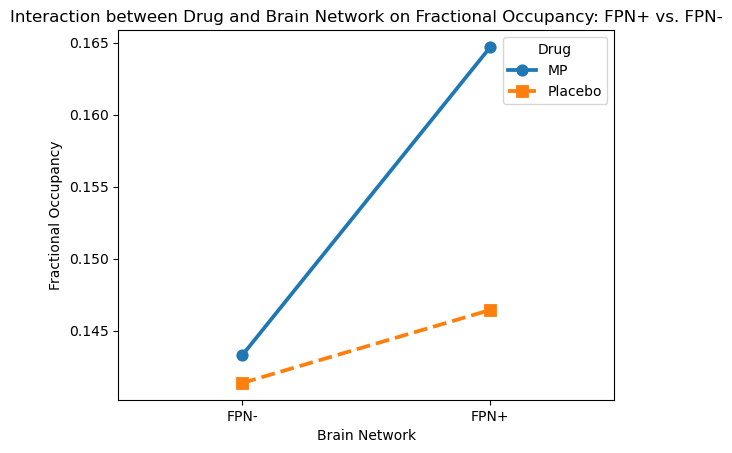

/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/1540606139.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='FractionalOccupancy', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


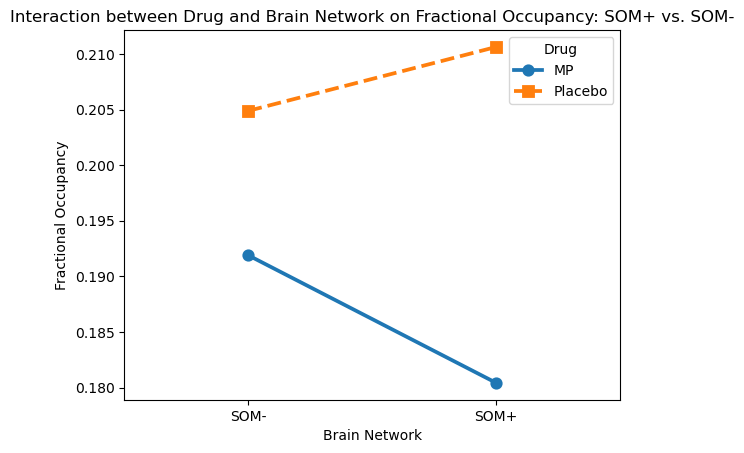

/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/1540606139.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='FractionalOccupancy', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


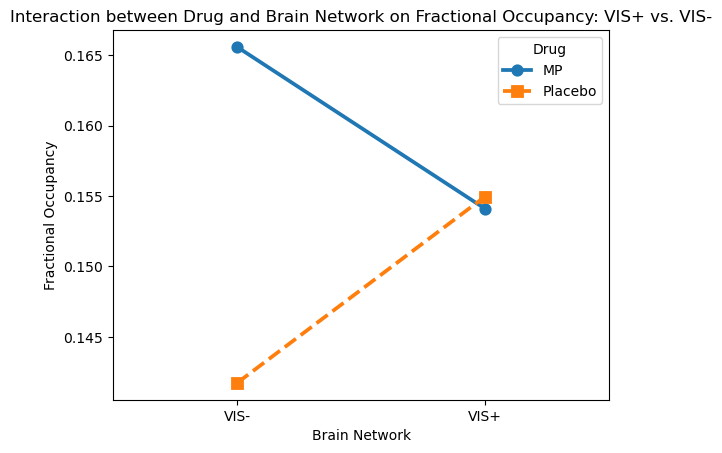

In [4]:
import scipy.io
import pandas as pd
import numpy as np

# Load the .mat files
mat_data = scipy.io.loadmat('results/example/ViolinData_bpmain_k6.mat')
value_name = 'FractionalOccupancy'
mp_data = mat_data['MPfo']
pl_data = mat_data['PLfo']

# Check the structure of the data
print(mp_data.shape)  # Should print (6, 37)
print(pl_data.shape)  # Should print (6, 37)

# Define brain networks
brain_networks = ['FPN-', 'FPN+', 'SOM-', 'SOM+', 'VIS-', 'VIS+']

# Transpose the data to have subjects as rows and brain networks as columns
mp_data = mp_data.T
pl_data = pl_data.T

# Create a DataFrame for MP data
mp_df = pd.DataFrame(mp_data, columns=brain_networks)
mp_df['Subject'] = np.arange(1, mp_df.shape[0] + 1)
mp_df = mp_df.melt(id_vars='Subject', var_name='BrainNetwork', value_name=value_name)
mp_df['Drug'] = 'MP'

# Create a DataFrame for PL data
pl_df = pd.DataFrame(pl_data, columns=brain_networks)
pl_df['Subject'] = np.arange(1, pl_df.shape[0] + 1)
pl_df = pl_df.melt(id_vars='Subject', var_name='BrainNetwork', value_name=value_name)
pl_df['Drug'] = 'Placebo'

# Combine the DataFrames
data = pd.concat([mp_df, pl_df])

# Display the first few rows of the dataset
print(data)


import statsmodels.formula.api as smf

def analyze_network_pair(network1, network2):
    subset_data = data[data['BrainNetwork'].isin([network1, network2])]
    model = smf.mixedlm("FractionalOccupancy ~ Drug * BrainNetwork", subset_data, groups=subset_data["Subject"])
    result = model.fit()
    print(f"Results for {network1} and {network2}")
    print(result.summary())

# Analyze FPN networks
analyze_network_pair('FPN+', 'FPN-')

# Analyze SOM networks
analyze_network_pair('SOM+', 'SOM-')

# Analyze VIS networks
analyze_network_pair('VIS+', 'VIS-')

import seaborn as sns
import matplotlib.pyplot as plt

def plot_network_pair(network1, network2):
    subset_data = data[data['BrainNetwork'].isin([network1, network2])]
    sns.pointplot(data=subset_data, x='BrainNetwork', y='FractionalOccupancy', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])
    plt.title(f'Interaction between Drug and Brain Network on Fractional Occupancy: {network1} vs. {network2}')
    plt.xlabel('Brain Network')
    plt.ylabel('Fractional Occupancy')
    plt.show()

# Plot FPN networks
plot_network_pair('FPN+', 'FPN-')

# Plot SOM networks
plot_network_pair('SOM+', 'SOM-')

# Plot VIS networks
plot_network_pair('VIS+', 'VIS-')

(6, 37)
(6, 37)
     Subject BrainNetwork  DwellTime     Drug
0          1         FPN-   4.073143       MP
1          2         FPN-   5.286600       MP
2          3         FPN-   3.564000       MP
3          4         FPN-   4.789125       MP
4          5         FPN-   6.716769       MP
..       ...          ...        ...      ...
217       33         VIS+   3.953813  Placebo
218       34         VIS+   4.455000  Placebo
219       35         VIS+   5.286600  Placebo
220       36         VIS+   7.722000  Placebo
221       37         VIS+   5.346000  Placebo

[444 rows x 4 columns]
Results for FPN+ and FPN-
                     Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         DwellTime
No. Observations:         148             Method:                     REML     
No. Groups:               37              Scale:                      0.9563   
Min. group size:          4               Log-Likelihood:             -231.0619
Max

/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/688254479.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='DwellTime', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


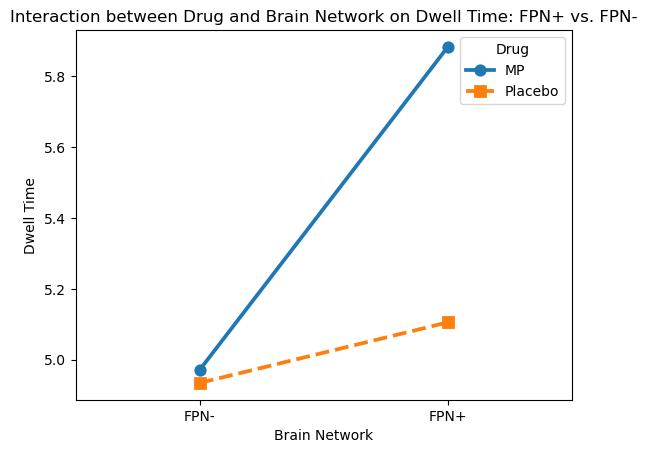

/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/688254479.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='DwellTime', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


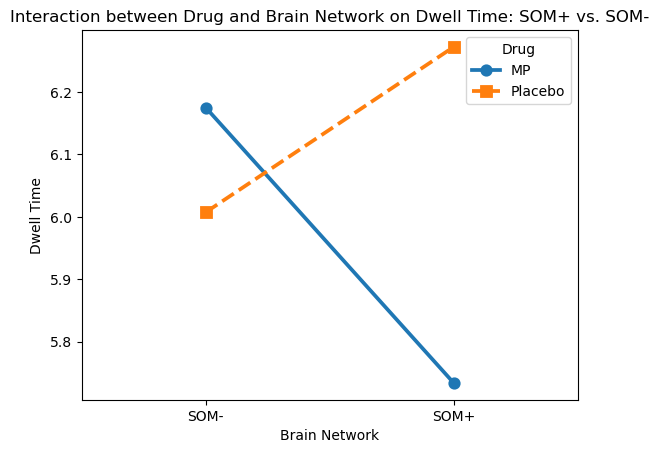

/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/688254479.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='DwellTime', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


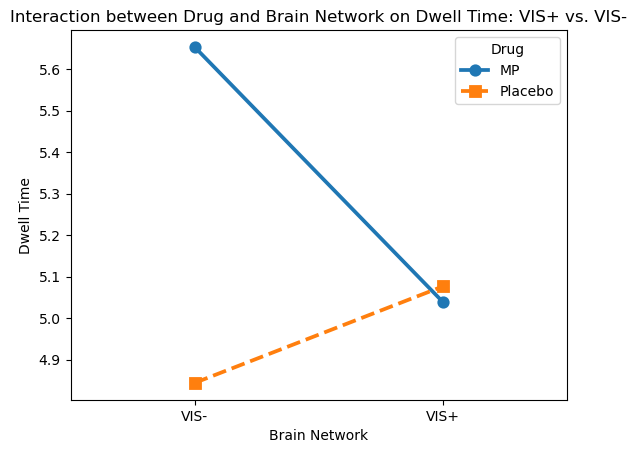

In [5]:
import scipy.io
import pandas as pd
import numpy as np

# Load the .mat files
mat_data = scipy.io.loadmat('results/example/ViolinData_bpmain_k6.mat')
value_name = 'DwellTime'
mp_data = mat_data['MPdt']
pl_data = mat_data['PLdt']

# Check the structure of the data
print(mp_data.shape)  # Should print (6, 37)
print(pl_data.shape)  # Should print (6, 37)

# Define brain networks
brain_networks = ['FPN-', 'FPN+', 'SOM-', 'SOM+', 'VIS-', 'VIS+']

# Transpose the data to have subjects as rows and brain networks as columns
mp_data = mp_data.T
pl_data = pl_data.T

# Create a DataFrame for MP data
mp_df = pd.DataFrame(mp_data, columns=brain_networks)
mp_df['Subject'] = np.arange(1, mp_df.shape[0] + 1)
mp_df = mp_df.melt(id_vars='Subject', var_name='BrainNetwork', value_name=value_name)
mp_df['Drug'] = 'MP'

# Create a DataFrame for PL data
pl_df = pd.DataFrame(pl_data, columns=brain_networks)
pl_df['Subject'] = np.arange(1, pl_df.shape[0] + 1)
pl_df = pl_df.melt(id_vars='Subject', var_name='BrainNetwork', value_name=value_name)
pl_df['Drug'] = 'Placebo'

# Combine the DataFrames
data = pd.concat([mp_df, pl_df])

# Display the first few rows of the dataset
print(data)


import statsmodels.formula.api as smf

def analyze_network_pair(network1, network2):
    subset_data = data[data['BrainNetwork'].isin([network1, network2])]
    model = smf.mixedlm("DwellTime ~ Drug * BrainNetwork", subset_data, groups=subset_data["Subject"])
    result = model.fit()
    print(f"Results for {network1} and {network2}")
    print(result.summary())

# Analyze FPN networks
analyze_network_pair('FPN+', 'FPN-')

# Analyze SOM networks
analyze_network_pair('SOM+', 'SOM-')

# Analyze VIS networks
analyze_network_pair('VIS+', 'VIS-')

import seaborn as sns
import matplotlib.pyplot as plt

def plot_network_pair(network1, network2):
    subset_data = data[data['BrainNetwork'].isin([network1, network2])]
    sns.pointplot(data=subset_data, x='BrainNetwork', y='DwellTime', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])
    plt.title(f'Interaction between Drug and Brain Network on Dwell Time: {network1} vs. {network2}')
    plt.xlabel('Brain Network')
    plt.ylabel('Dwell Time')
    plt.show()

# Plot FPN networks
plot_network_pair('FPN+', 'FPN-')

# Plot SOM networks
plot_network_pair('SOM+', 'SOM-')

# Plot VIS networks
plot_network_pair('VIS+', 'VIS-')

/Users/yanw4/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


(6, 37)
(6, 37)
     Subject BrainNetwork  AppearanceRate     Drug
0          1         FPN-        1.852183       MP
1          2         FPN-        1.996247       MP
2          3         FPN-        1.870557       MP
3          4         FPN-        1.058390       MP
4          5         FPN-        1.740399       MP
..       ...          ...             ...      ...
217       33         VIS+        2.072002  Placebo
218       34         VIS+        1.193033  Placebo
219       35         VIS+        2.040608  Placebo
220       36         VIS+        2.032396  Placebo
221       37         VIS+        2.227201  Placebo

[444 rows x 4 columns]
Results for FPN+ and FPN-
                     Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       AppearanceRate
No. Observations:        148           Method:                   REML          
No. Groups:              37            Scale:                    0.0917        
Min. group size:       

/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/3079242348.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='AppearanceRate', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


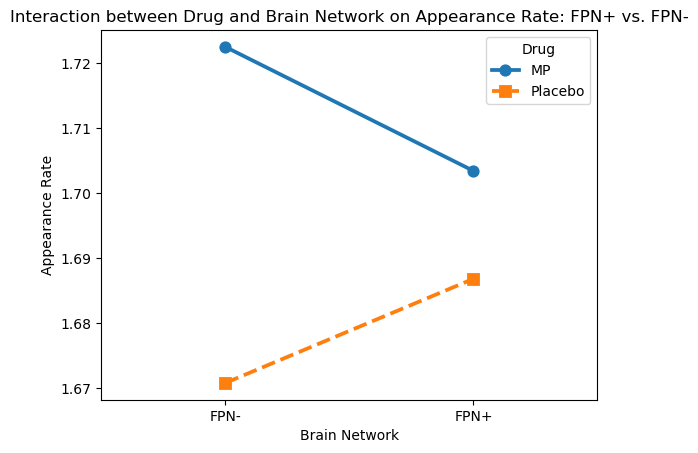

/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/3079242348.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='AppearanceRate', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


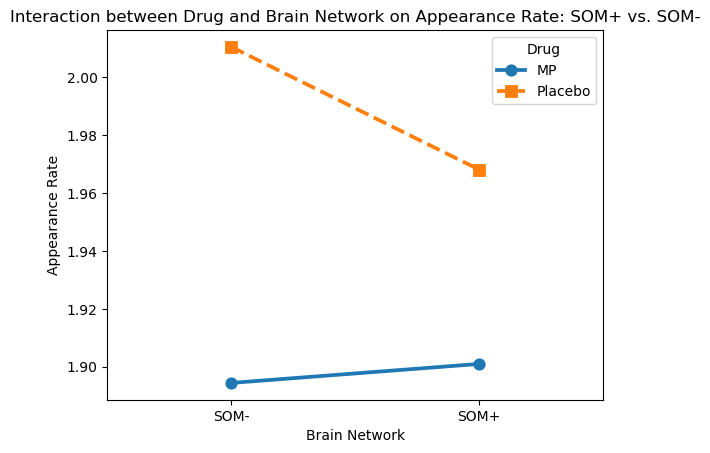

/var/folders/d3/wwm472m9347b1m8mhzpvsh_jmglkhh/T/ipykernel_5663/3079242348.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=subset_data, x='BrainNetwork', y='AppearanceRate', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])


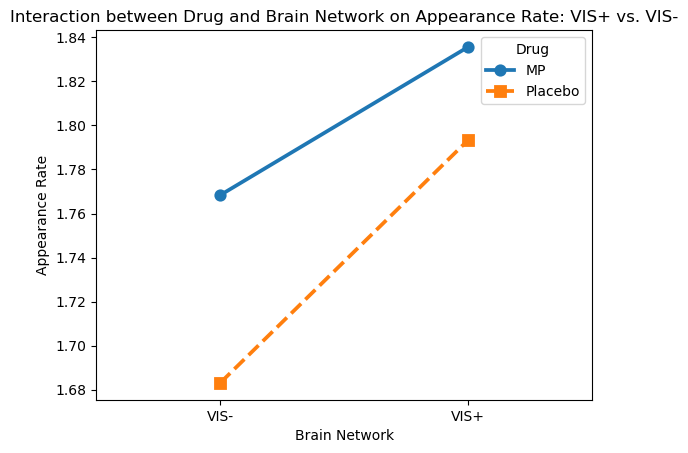

In [6]:
import scipy.io
import pandas as pd
import numpy as np

# Load the .mat files
mat_data = scipy.io.loadmat('results/example/ViolinData_bpmain_k6.mat')
value_name = 'AppearanceRate'
mp_data = mat_data['MPar']
pl_data = mat_data['PLar']

# Check the structure of the data
print(mp_data.shape)  # Should print (6, 37)
print(pl_data.shape)  # Should print (6, 37)

# Define brain networks
brain_networks = ['FPN-', 'FPN+', 'SOM-', 'SOM+', 'VIS-', 'VIS+']

# Transpose the data to have subjects as rows and brain networks as columns
mp_data = mp_data.T
pl_data = pl_data.T

# Create a DataFrame for MP data
mp_df = pd.DataFrame(mp_data, columns=brain_networks)
mp_df['Subject'] = np.arange(1, mp_df.shape[0] + 1)
mp_df = mp_df.melt(id_vars='Subject', var_name='BrainNetwork', value_name=value_name)
mp_df['Drug'] = 'MP'

# Create a DataFrame for PL data
pl_df = pd.DataFrame(pl_data, columns=brain_networks)
pl_df['Subject'] = np.arange(1, pl_df.shape[0] + 1)
pl_df = pl_df.melt(id_vars='Subject', var_name='BrainNetwork', value_name=value_name)
pl_df['Drug'] = 'Placebo'

# Combine the DataFrames
data = pd.concat([mp_df, pl_df])

# Display the first few rows of the dataset
print(data)


import statsmodels.formula.api as smf

def analyze_network_pair(network1, network2):
    subset_data = data[data['BrainNetwork'].isin([network1, network2])]
    model = smf.mixedlm("AppearanceRate ~ Drug * BrainNetwork", subset_data, groups=subset_data["Subject"])
    result = model.fit()
    print(f"Results for {network1} and {network2}")
    print(result.summary())

# Analyze FPN networks
analyze_network_pair('FPN+', 'FPN-')

# Analyze SOM networks
analyze_network_pair('SOM+', 'SOM-')

# Analyze VIS networks
analyze_network_pair('VIS+', 'VIS-')

import seaborn as sns
import matplotlib.pyplot as plt

def plot_network_pair(network1, network2):
    subset_data = data[data['BrainNetwork'].isin([network1, network2])]
    sns.pointplot(data=subset_data, x='BrainNetwork', y='AppearanceRate', hue='Drug', ci=None, markers=['o', 's'], linestyles=['-', '--'])
    plt.title(f'Interaction between Drug and Brain Network on Appearance Rate: {network1} vs. {network2}')
    plt.xlabel('Brain Network')
    plt.ylabel('Appearance Rate')
    plt.show()

# Plot FPN networks
plot_network_pair('FPN+', 'FPN-')

# Plot SOM networks
plot_network_pair('SOM+', 'SOM-')

# Plot VIS networks
plot_network_pair('VIS+', 'VIS-')